In [1]:
%matplotlib inline

# Load Data from Copernicus Marine Services (CMEMS)

In [2]:
# https://help.marine.copernicus.eu/en/articles/8287609-copernicus-marine-toolbox-api-open-a-dataset-or-read-a-dataframe-remotely

In [3]:
import matplotlib.pyplot as plt
import copernicusmarine
import xarray as xr
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature

/Users/volkerh/miniforge3/envs/climarest/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# # https://help.marine.copernicus.eu/en/articles/8185007-copernicus-marine-toolbox-credentials-configuration
# copernicusmarine.login()

## Load into XArray

In [5]:
# Import modules
# import copernicusmarine

# We want to use this dataset:
# https://data.marine.copernicus.eu/product/IBI_ANALYSISFORECAST_PHY_005_001/description
# https://data.marine.copernicus.eu/product/IBI_ANALYSISFORECAST_PHY_005_001/services

tlo = datetime.datetime.now().isoformat()
thi = (datetime.datetime.now() + datetime.timedelta(days=7)).isoformat()

# Set parameters
data_request = {
    "dataset_id" : "cmems_mod_ibi_phy_anfc_0.027deg-3D_PT1H-m",  # 3D, hourly
    # "dataset_id" : "cmems_mod_ibi_phy_anfc_0.027deg-2D_PT1H-m",  # 2D, hourly
    # "dataset_id" : "cmems_mod_ibi_phy_anfc_0.027deg-2D_PT15M-i",  # 2D, 15min
    # "dataset_id" : "cmems_mod_ibi_phy-wcur_anfc_0.027deg_P1D-m",  # vertical currents, daily
    "longitude" : [-6.17, -5.09], 
    "latitude" : [35.75, 36.29],
    "time" : [tlo, thi],
    # "time" : ["2025-05-10", "2025-05-12"],
    # "variables" : ["sea_surface_temperature"]
}

# Load xarray dataset
dset = copernicusmarine.open_dataset(
    dataset_id = data_request["dataset_id"],
    # minimum_longitude = data_request["longitude"][0],
    # maximum_longitude = data_request["longitude"][1],
    # minimum_latitude = data_request["latitude"][0],
    # maximum_latitude = data_request["latitude"][1],
    start_datetime = data_request["time"][0],
    end_datetime = data_request["time"][1],
    # variables = data_request["variables"]
)

# Print loaded dataset information
# print(dset)

INFO - 2025-05-13T08:52:52Z - Selected dataset version: "202411"
INFO - 2025-05-13T08:52:52Z - Selected dataset part: "default"


In [6]:
dset

<xarray.Dataset> Size: 252GB
Dimensions:    (depth: 50, latitude: 1078, longitude: 871, time: 168)
Coordinates:
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 4kB 26.17 26.19 26.22 ... 56.03 56.06 56.08
  * longitude  (longitude) float32 3kB -19.08 -19.06 -19.03 ... 5.057 5.085
  * time       (time) datetime64[ns] 1kB 2025-05-13T11:00:00 ... 2025-05-20T1...
Data variables:
    so         (time, depth, latitude, longitude) float64 63GB dask.array<chunksize=(1, 50, 1014, 840), meta=np.ndarray>
    thetao     (time, depth, latitude, longitude) float64 63GB dask.array<chunksize=(1, 50, 1014, 840), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float64 63GB dask.array<chunksize=(1, 50, 1014, 840), meta=np.ndarray>
    vo         (time, depth, latitude, longitude) float64 63GB dask.array<chunksize=(1, 50, 1014, 840), meta=np.ndarray>
Attributes:
    contact:      https://marine.copernicus.eu/contact
    references:   http://marine.copernicus.eu/
    source:       NEMO3.6
    institution:  NOW Systems (Spain)
    comment:      
    Conventions:  CF-1.8
    title:        Ocean 3D hourly mean fields for the Iberia-Biscay-Ireland (...

## Plot

In [7]:
data = dset["thetao"]

In [8]:
data.sel(time=data.time[0], depth=data.depth[0])

<xarray.DataArray 'thetao' (latitude: 1078, longitude: 871)> Size: 8MB
dask.array<getitem, shape=(1078, 871), dtype=float64, chunksize=(1014, 840), chunktype=numpy.ndarray>
Coordinates:
    depth      float32 4B 0.494
  * latitude   (latitude) float32 4kB 26.17 26.19 26.22 ... 56.03 56.06 56.08
  * longitude  (longitude) float32 3kB -19.08 -19.06 -19.03 ... 5.057 5.085
    time       datetime64[ns] 8B 2025-05-13T11:00:00
Attributes: (12/14)
    easting:        longitude
    latitude_max:   56.08294177f
    latitude_min:   26.16535726f
    long_name:      Temperature
    longitude_max:  5.084567f
    longitude_min:  -19.0828411f
    ...             ...
    unit_long:      degrees_C
    units:          degrees_C
    valid_max:      22000
    valid_min:      -16000
    z_max:          5727.917f
    z_min:          0.4940254f

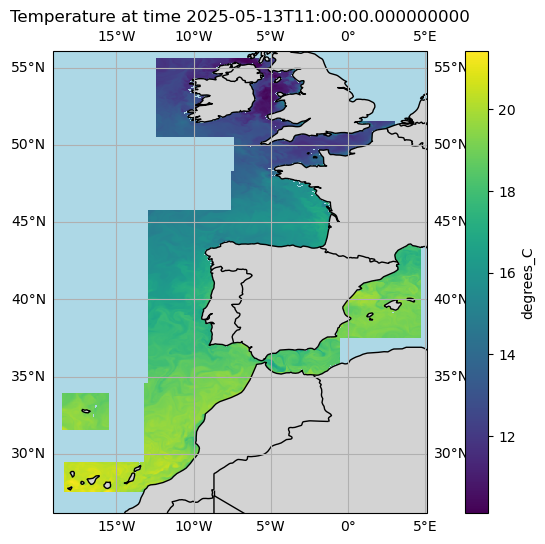

In [9]:
# Choose the projection
proj = ccrs.PlateCarree()

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': proj})

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.gridlines(draw_labels=True)

# Plot the data (selecting a time slice if necessary)
data.sel(time=data.time[0], depth=data.depth[0]).plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="viridis",
    cbar_kwargs={'label': f"{data.units}"}
)

ax.set_title(f"Temperature at time {data.time[0].values}")
pass